# Pre-processing

### Garbage in garbage out!
Prepearing the data to the classification task by taking care of:
- Missing values 
- Outliers 
- Inconsistencies 
- Normalization
- Discretization <br> 
and more

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

In [3]:
df = pd.read_csv("./data/titanic.csv")
df['Fare'] = df['Fare'].str.extract('(\d+\.?\d*)', expand = True).astype(float)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


## Missing values
In order to decide how to handle the missing values for a specific attribute, we should consider the following:
- Are the values continuous or categorical?
- How many objects are missing?
- The attribute distribution
- The relations between attributes
- The relations between objects 

The decisions we can make:
- Completing the missing values
- Deleting the row with the missing values
- Deleting the column with the missing values
- Do nothing


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns with missing values are 'Age', 'Cabin' and 'Embarked'. We will take care each one of them separately and differently.<br>
Before dealing with each attribute, we will check if there are rows with too much missing data.

In [5]:
df[df.isnull().sum(axis=1)>1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.23,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.23,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.88,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.23,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.50,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.90,NaN,S


In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Embarked
This is a categorical feature and it only has two missing values.

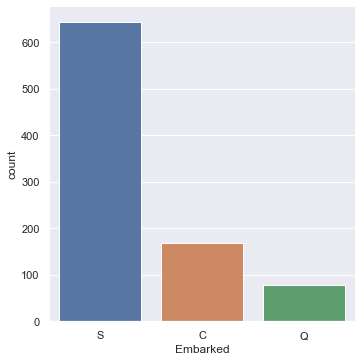

In [7]:
sns.catplot(x = 'Embarked', kind = 'count', data = df)

In [8]:
df['Embarked'].value_counts()['S']/df.shape[0]

0.7227833894500562

Since both of the missing values are for females we can check if there is a difference for females.

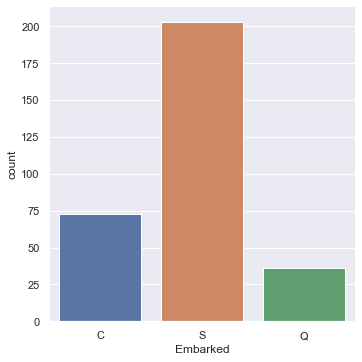

In [9]:
female_df = df[df['Sex']=='female']
sns.catplot(x = 'Embarked', kind = 'count', data = female_df)

72% of the values are 'S' and as we saw there are only two missing values hence, we can complete them with the mode - 'S'.

In [10]:
mode = df['Embarked'].mode()[0]
mode

'S'

In [11]:
df['Embarked'] = df['Embarked'].fillna(mode)

In [12]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Cabin

This is a categorical attribute and it has a lot of missing values and unique values.

In [13]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

As we can see, the values consist of letters and numbers who represent the deck and the room number. In addition, there are passenger with more than one cabin but they are one the same deck.

In [14]:
df['Cabin'] = df['Cabin'].fillna('Missing')
df['Deck'] = df['Cabin'].str[0]
df['Deck'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

'T' is outlier?

In [15]:
df[df['Deck']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [16]:
df.loc[df['Deck']=='T', 'Deck'] = 'M'
df['Deck'].value_counts()

M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Deck, dtype: int64

### Age
Since this attribute is continuous, several methods can be applied to complete the values.

##### 1. Filling missing values by median/mean.


In [17]:
df['Age_1'] = df['Age'].fillna(value=df['Age'].median()) 

##### 2. Filling missing values by exploring correlations. 

Categorical data should be adjusted before calculating the correlation.

In [18]:
df['Sex_cat'] = df['Sex'].astype('category').cat.codes
df['Embarked_cat'] = df['Embarked'].astype('category').cat.codes

In [19]:
df.groupby(['Sex','Sex_cat']).size()

Sex     Sex_cat
female  0          314
male    1          577
dtype: int64

In [20]:
df.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_1,Sex_cat,Embarked_cat
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012659,0.034212,0.042939,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257303,-0.064910,-0.543351,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549490,-0.339898,0.131900,0.162098
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096062,1.000000,0.093254,-0.030394
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159654,-0.233296,-0.114631,0.068230
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216228,-0.172482,-0.245489,0.039798
Fare,0.012659,0.257303,-0.549490,0.096062,0.159654,0.216228,1.000000,0.096684,-0.182330,-0.224719
Age_1,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096684,1.000000,0.081163,-0.018754
Sex_cat,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182330,0.081163,1.000000,0.108262
Embarked_cat,0.013128,-0.167675,0.162098,-0.030394,0.068230,0.039798,-0.224719,-0.018754,0.108262,1.000000


Visualization of the correlation matrix

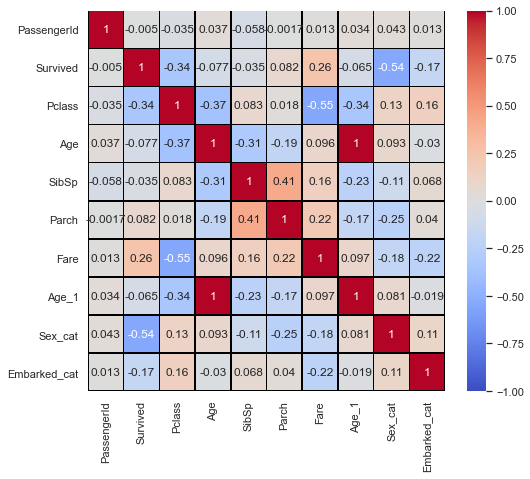

In [21]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.5, linecolor='black')

There is a correlation with 'Pclass', therefore it is an option to divide into three groups conforming to this attribute and in each group complete the value according to the median/mean.

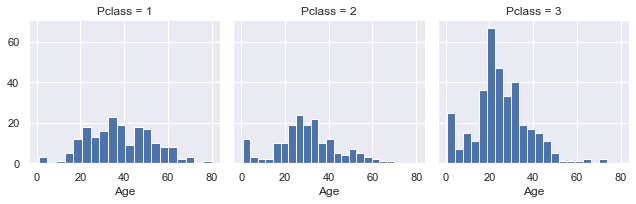

In [22]:
g = sns.FacetGrid(df, col='Pclass')
g.map(plt.hist, 'Age', bins=20);

In [23]:
for i in df['Pclass'].unique(): 
    df['Age'][df['Pclass']==i].median()
    print('For class ', i, ' the median is ', df.loc[df['Pclass']==i , 'Age'].median())
    print('and the number of missing values is ', df.loc[df['Pclass']==i , 'Age'].isnull().sum(), 
          'out of ',(df['Pclass']==i).sum(), 'rows')

For class  3  the median is  24.0
and the number of missing values is  136 out of  491 rows
For class  1  the median is  37.0
and the number of missing values is  30 out of  216 rows
For class  2  the median is  29.0
and the number of missing values is  11 out of  184 rows


In class 3 there are too many missing values hence we will handle them differently.

In [24]:
df['Age_2'] = df['Age']
for i in [1,2]:
    df.loc[df['Pclass']==i , 'Age_2'] = df['Age_2'][df['Pclass']==i].fillna(value=df['Age_2'][df['Pclass']==i].median())

For class 3 we will generate random values from a similar distribution.

In [25]:
mu = df.loc[df['Pclass']==3 , 'Age_2'].mean()
sigma = df.loc[df['Pclass']==3 , 'Age_2'].std()

In [26]:
class_3_missing_values = df.loc[df['Pclass']==3][df.loc[df['Pclass']==3 , 'Age_2'].isnull()]

In [27]:
for row in class_3_missing_values.index:
    df['Age_2'][row] = np.random.normal(mu, sigma)

<ipython-input-27-ddc9b3bfd082>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_2'][row] = np.random.normal(mu, sigma)


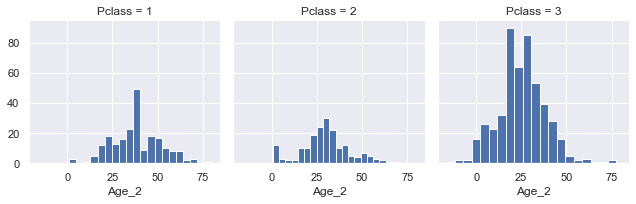

In [28]:
g = sns.FacetGrid(df, col='Pclass')
g.map(plt.hist, 'Age_2', bins=20);

#### Save the data with the pre-process we did 


In [29]:
df.to_csv('Titanic_3.csv')